## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  36.621723  1337.470821  0.545183  7.639178  730.043634
1  44.988495   257.288620  0.633880  7.785991  169.216749
2  32.872885  1166.732734  0.314742  7.072593  368.460017
3  66.576468   573.679357  0.646376  7.038062  376.755149
4  32.549718   404.238206  0.262972  1.675992  111.235260


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0244324	total: 57ms	remaining: 56.9s
1:	learn: 1.0128687	total: 58ms	remaining: 29s
2:	learn: 1.0005272	total: 58.5ms	remaining: 19.4s
3:	learn: 0.9898289	total: 59.7ms	remaining: 14.9s
4:	learn: 0.9779522	total: 60ms	remaining: 11.9s
5:	learn: 0.9675063	total: 60.7ms	remaining: 10.1s
6:	learn: 0.9553415	total: 61.2ms	remaining: 8.68s
7:	learn: 0.9434794	total: 61.7ms	remaining: 7.65s
8:	learn: 0.9353776	total: 62.1ms	remaining: 6.84s
9:	learn: 0.9227253	total: 62.5ms	remaining: 6.18s
10:	learn: 0.9135712	total: 62.9ms	remaining: 5.66s
11:	learn: 0.9023319	total: 63.3ms	remaining: 5.21s
12:	learn: 0.8895586	total: 63.7ms	remaining: 4.83s
13:	learn: 0.8763812	total: 64.1ms	remaining: 4.52s
14:	learn: 0.8661553	total: 64.6ms	remaining: 4.24s
15:	learn: 0.8577882	total: 65.1ms	remaining: 4.01s
16:	learn: 0.8452888	total: 65.7ms	remaining: 3.8s
17:	learn: 0.8370825	total: 66.2ms	remaining: 3.61s
18:	learn: 0.8300633	total: 67.4ms	remaining: 3.48s
1

94:	learn: 0.3510095	total: 104ms	remaining: 995ms
95:	learn: 0.3475393	total: 105ms	remaining: 989ms
96:	learn: 0.3436331	total: 106ms	remaining: 983ms
97:	learn: 0.3403610	total: 106ms	remaining: 978ms
98:	learn: 0.3360673	total: 107ms	remaining: 972ms
99:	learn: 0.3321136	total: 107ms	remaining: 965ms
100:	learn: 0.3287176	total: 108ms	remaining: 959ms
101:	learn: 0.3257930	total: 108ms	remaining: 954ms
102:	learn: 0.3223321	total: 109ms	remaining: 948ms
103:	learn: 0.3197863	total: 109ms	remaining: 942ms
104:	learn: 0.3158969	total: 110ms	remaining: 936ms
105:	learn: 0.3126613	total: 110ms	remaining: 931ms
106:	learn: 0.3093014	total: 111ms	remaining: 925ms
107:	learn: 0.3060042	total: 111ms	remaining: 920ms
108:	learn: 0.3028049	total: 112ms	remaining: 912ms
109:	learn: 0.2990831	total: 112ms	remaining: 906ms
110:	learn: 0.2962890	total: 112ms	remaining: 900ms
111:	learn: 0.2933496	total: 113ms	remaining: 894ms
112:	learn: 0.2909493	total: 113ms	remaining: 889ms
113:	learn: 0.2884

279:	learn: 0.0724763	total: 186ms	remaining: 479ms
280:	learn: 0.0722093	total: 187ms	remaining: 478ms
281:	learn: 0.0719580	total: 187ms	remaining: 477ms
282:	learn: 0.0712629	total: 188ms	remaining: 476ms
283:	learn: 0.0710105	total: 188ms	remaining: 475ms
284:	learn: 0.0706243	total: 189ms	remaining: 474ms
285:	learn: 0.0702615	total: 189ms	remaining: 472ms
286:	learn: 0.0696067	total: 190ms	remaining: 471ms
287:	learn: 0.0693656	total: 190ms	remaining: 470ms
288:	learn: 0.0689961	total: 191ms	remaining: 469ms
289:	learn: 0.0686201	total: 191ms	remaining: 468ms
290:	learn: 0.0679547	total: 191ms	remaining: 467ms
291:	learn: 0.0675880	total: 192ms	remaining: 465ms
292:	learn: 0.0673632	total: 192ms	remaining: 464ms
293:	learn: 0.0670593	total: 193ms	remaining: 463ms
294:	learn: 0.0667353	total: 193ms	remaining: 462ms
295:	learn: 0.0662507	total: 194ms	remaining: 461ms
296:	learn: 0.0660215	total: 194ms	remaining: 460ms
297:	learn: 0.0658056	total: 195ms	remaining: 459ms
298:	learn: 

486:	learn: 0.0272822	total: 287ms	remaining: 302ms
487:	learn: 0.0272527	total: 288ms	remaining: 302ms
488:	learn: 0.0270937	total: 289ms	remaining: 302ms
489:	learn: 0.0269535	total: 289ms	remaining: 301ms
490:	learn: 0.0269250	total: 289ms	remaining: 300ms
491:	learn: 0.0267710	total: 290ms	remaining: 299ms
492:	learn: 0.0266683	total: 290ms	remaining: 299ms
493:	learn: 0.0265679	total: 291ms	remaining: 298ms
494:	learn: 0.0264739	total: 291ms	remaining: 297ms
495:	learn: 0.0263405	total: 292ms	remaining: 296ms
496:	learn: 0.0261954	total: 292ms	remaining: 296ms
497:	learn: 0.0260538	total: 293ms	remaining: 295ms
498:	learn: 0.0259124	total: 293ms	remaining: 294ms
499:	learn: 0.0258175	total: 294ms	remaining: 294ms
500:	learn: 0.0257170	total: 294ms	remaining: 293ms
501:	learn: 0.0256188	total: 295ms	remaining: 292ms
502:	learn: 0.0255230	total: 295ms	remaining: 291ms
503:	learn: 0.0254294	total: 296ms	remaining: 291ms
504:	learn: 0.0253380	total: 296ms	remaining: 290ms
505:	learn: 

663:	learn: 0.0137813	total: 369ms	remaining: 187ms
664:	learn: 0.0137379	total: 370ms	remaining: 186ms
665:	learn: 0.0136733	total: 370ms	remaining: 186ms
666:	learn: 0.0136093	total: 371ms	remaining: 185ms
667:	learn: 0.0135562	total: 371ms	remaining: 184ms
668:	learn: 0.0134969	total: 371ms	remaining: 184ms
669:	learn: 0.0134452	total: 372ms	remaining: 183ms
670:	learn: 0.0133876	total: 372ms	remaining: 183ms
671:	learn: 0.0133347	total: 373ms	remaining: 182ms
672:	learn: 0.0132605	total: 373ms	remaining: 181ms
673:	learn: 0.0132142	total: 374ms	remaining: 181ms
674:	learn: 0.0131689	total: 374ms	remaining: 180ms
675:	learn: 0.0131231	total: 375ms	remaining: 180ms
676:	learn: 0.0130776	total: 375ms	remaining: 179ms
677:	learn: 0.0130330	total: 376ms	remaining: 178ms
678:	learn: 0.0129892	total: 376ms	remaining: 178ms
679:	learn: 0.0129359	total: 377ms	remaining: 177ms
680:	learn: 0.0129000	total: 377ms	remaining: 177ms
681:	learn: 0.0128612	total: 377ms	remaining: 176ms
682:	learn: 

880:	learn: 0.0071762	total: 469ms	remaining: 63.4ms
881:	learn: 0.0071554	total: 470ms	remaining: 62.9ms
882:	learn: 0.0071339	total: 470ms	remaining: 62.3ms
883:	learn: 0.0071241	total: 471ms	remaining: 61.8ms
884:	learn: 0.0071041	total: 471ms	remaining: 61.2ms
885:	learn: 0.0070811	total: 472ms	remaining: 60.7ms
886:	learn: 0.0070610	total: 472ms	remaining: 60.1ms
887:	learn: 0.0070402	total: 472ms	remaining: 59.6ms
888:	learn: 0.0070228	total: 473ms	remaining: 59.1ms
889:	learn: 0.0070006	total: 473ms	remaining: 58.5ms
890:	learn: 0.0069835	total: 474ms	remaining: 58ms
891:	learn: 0.0069739	total: 474ms	remaining: 57.4ms
892:	learn: 0.0069502	total: 475ms	remaining: 56.9ms
893:	learn: 0.0069286	total: 475ms	remaining: 56.3ms
894:	learn: 0.0069091	total: 475ms	remaining: 55.8ms
895:	learn: 0.0068879	total: 476ms	remaining: 55.2ms
896:	learn: 0.0068689	total: 476ms	remaining: 54.7ms
897:	learn: 0.0068480	total: 477ms	remaining: 54.1ms
898:	learn: 0.0068289	total: 477ms	remaining: 53

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

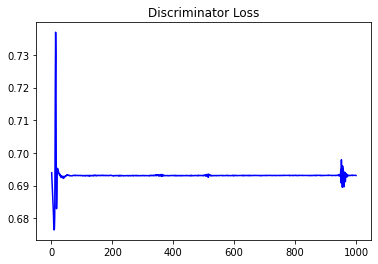

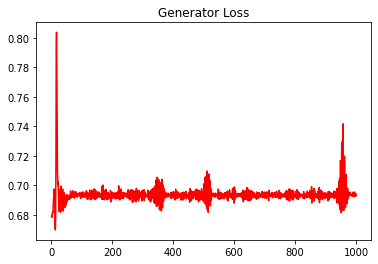

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.012373029304186515


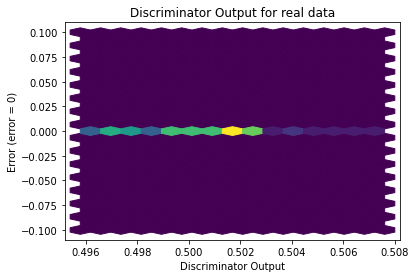

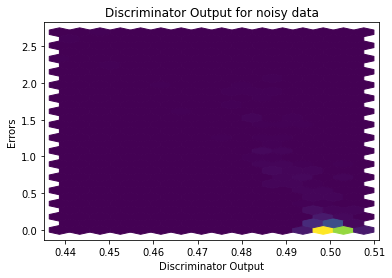

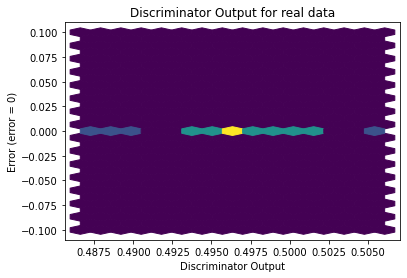

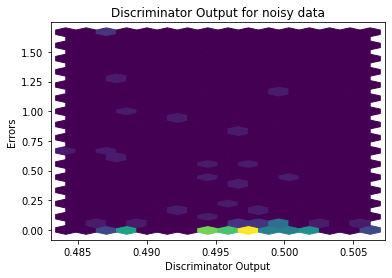

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


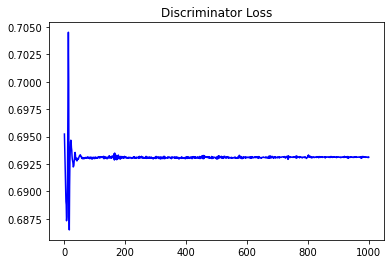

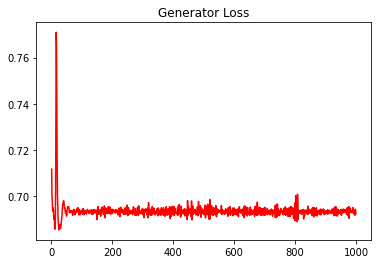

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.00808869645830033


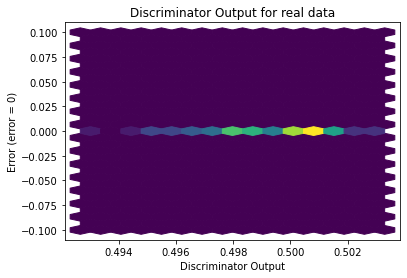

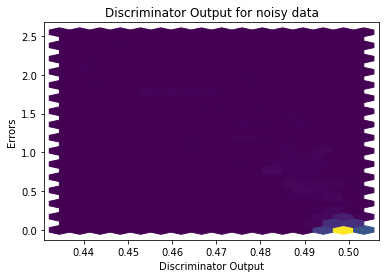

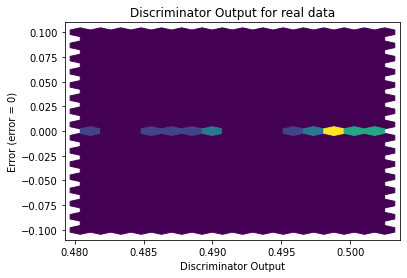

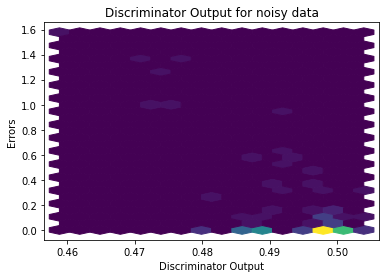

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4918]], requires_grad=True)
